In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# importa el dataset train.csv
data = pd.read_csv('train.csv')
data.head(10)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,Si,Educación profesional completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Educación profesional incompleta,Si,...,N,Si,Si,Si,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Si,Primaria incompleta,Si,...,N,Si,No,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Si,Postgrado,Si,...,N,Si,Si,Si,Postgrado,alto,0.535,0.122,0.257,0.167


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

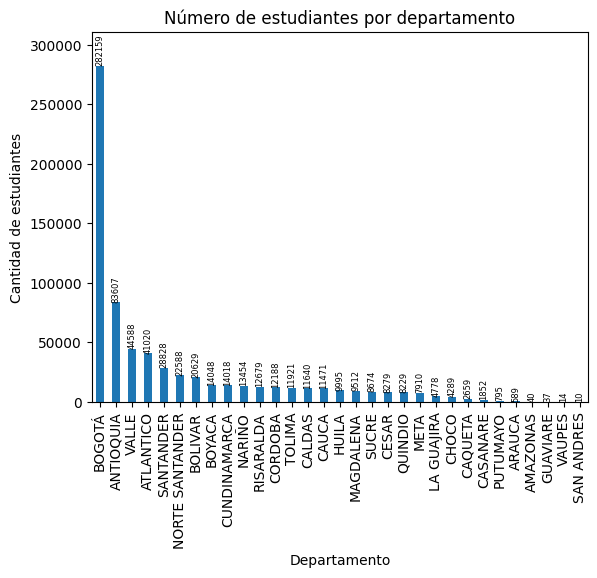

In [35]:
counts = data['E_PRGM_DEPARTAMENTO'].value_counts()

ax = counts.plot(kind='bar')
plt.title('Número de estudiantes por departamento')
plt.ylabel('Cantidad de estudiantes')
plt.xlabel('Departamento')

# Ajustar el límite del eje Y (10% más alto que el máximo)
plt.ylim(0, counts.max() * 1.1)

for i, value in enumerate(counts):
    plt.text(i, value + 0.5, str(value),
             ha='center', va='bottom',
             rotation=90, fontsize=6)

plt.show()


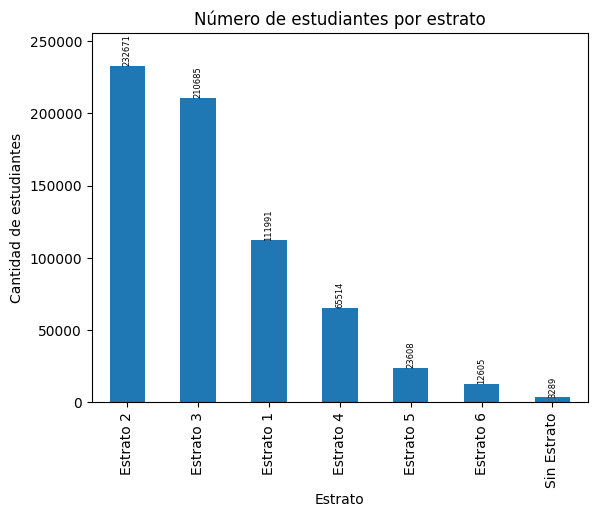

In [36]:
counts = data['F_ESTRATOVIVIENDA'].value_counts()

ax = counts.plot(kind='bar')
plt.title('Número de estudiantes por estrato')
plt.ylabel('Cantidad de estudiantes')
plt.xlabel('Estrato')

# Ajustar el límite del eje Y (10% más alto que el máximo)
plt.ylim(0, counts.max() * 1.1)

for i, value in enumerate(counts):
    plt.text(i, value + 0.5, str(value),
             ha='center', va='bottom',
             rotation=90, fontsize=6)

plt.show()


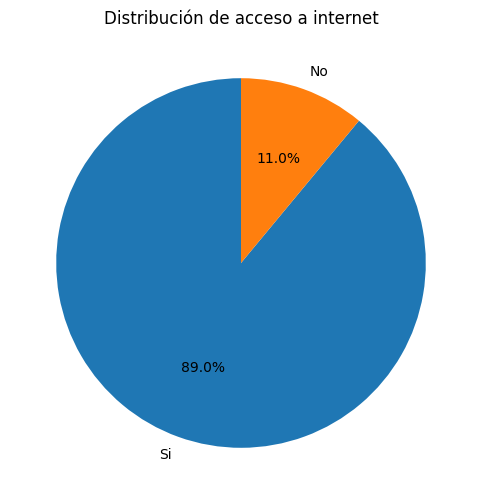

In [37]:
# Contar los valores de la columna 'internet'
conteo = data["F_TIENEINTERNET"].value_counts()

# Crear diagrama de torta
plt.figure(figsize=(6,6))
plt.pie(conteo, labels=conteo.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de acceso a internet")
plt.show()        


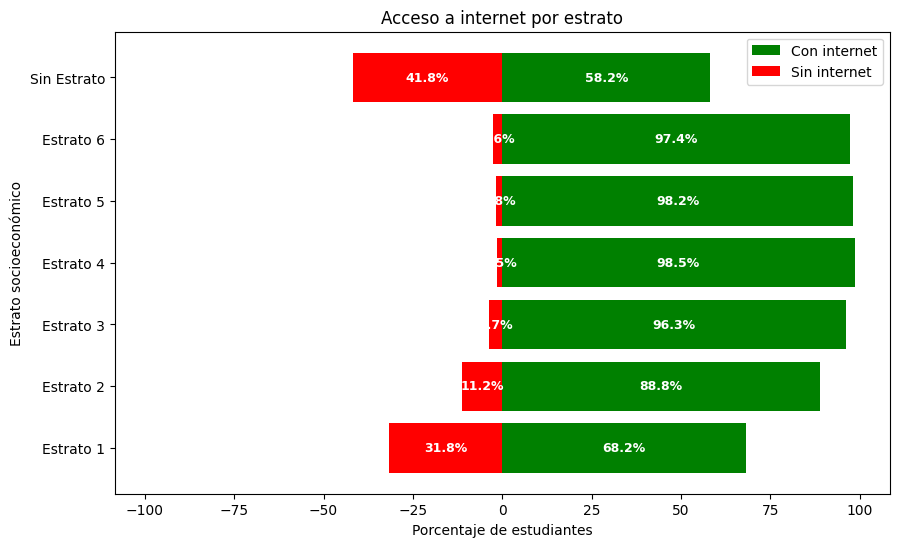

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear copia solo con las columnas necesarias
df_inet = data[["F_ESTRATOVIVIENDA", "F_TIENEINTERNET"]].dropna().copy()

# Normalizar valores de internet en la copia
df_inet["F_TIENEINTERNET"] = df_inet["F_TIENEINTERNET"].str.strip().str.lower()
df_inet["F_TIENEINTERNET"] = df_inet["F_TIENEINTERNET"].replace({
    "si": "Sí", "sí": "Sí", "s": "Sí", "1": "Sí", "true": "Sí",
    "no": "No", "n": "No", "0": "No", "false": "No"
})

# Agrupar conteos
conteo = df_inet.groupby(["F_ESTRATOVIVIENDA", "F_TIENEINTERNET"]).size().unstack(fill_value=0)

# Asegurar columnas
if "Sí" not in conteo.columns: conteo["Sí"] = 0
if "No" not in conteo.columns: conteo["No"] = 0

# Calcular porcentajes por estrato
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100

# Pasar "No" a negativo para graficar estilo pirámide
porcentaje["No"] = -porcentaje["No"]

# Graficar
fig, ax = plt.subplots(figsize=(10,6))

bars_si = ax.barh(porcentaje.index, porcentaje["Sí"], color="green", label="Con internet")
bars_no = ax.barh(porcentaje.index, porcentaje["No"], color="red", label="Sin internet")

# Etiquetas dentro de las barras
for bars in [bars_si, bars_no]:
    for bar in bars:
        width = bar.get_width()
        if width != 0:
            ax.text(
                bar.get_x() + width/2,        # posición centrada
                bar.get_y() + bar.get_height()/2,
                f"{abs(width):.1f}%",         # porcentaje positivo
                ha="center", va="center", color="white", fontsize=9, fontweight="bold"
            )

# Estética
ax.set_xlabel("Porcentaje de estudiantes")
ax.set_ylabel("Estrato socioeconómico")
ax.set_title("Acceso a internet por estrato")
ax.legend()

# Límites simétricos
max_val = max(porcentaje["Sí"].max(), abs(porcentaje["No"].min())) * 1.1
ax.set_xlim(-max_val, max_val)

plt.show()


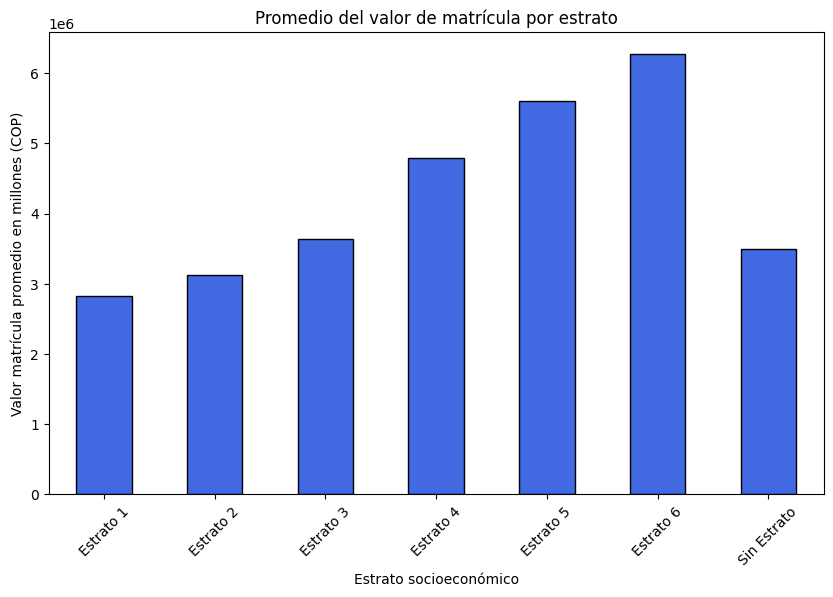

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# ======================
# 1. Preparar los datos
# ======================

# Copia de columnas necesarias
df_matricula = data[["F_ESTRATOVIVIENDA", "E_VALORMATRICULAUNIVERSIDAD"]].dropna().copy()

# Diccionario para mapear los rangos a valores aproximados (en pesos)
mapa_valores = {
    "Entre 1 millón y menos de 2.5 millones": 1.75e6,
    "Entre 2.5 millones y menos de 4 millones": 3.25e6,
    "Entre 4 millones y menos de 5.5 millones": 4.75e6,
    "Entre 5.5 millones y menos de 7 millones": 6.25e6,
    "Más de 7 millones": 7.5e6  # se puede ajustar si hay un valor máximo conocido
}

# Crear columna numérica
df_matricula["VALOR_APROX"] = df_matricula["E_VALORMATRICULAUNIVERSIDAD"].map(mapa_valores)

# Asegurarse de que VALOR_APROX sea tipo float para poder calcular el promedio
df_matricula["VALOR_APROX"] = df_matricula["VALOR_APROX"].astype(float)

# ======================
# 2. Promedio por estrato
# ======================

promedio = df_matricula.groupby("F_ESTRATOVIVIENDA")["VALOR_APROX"].mean()

# ======================
# 3. Gráfico de barras (promedio)
# ======================

plt.figure(figsize=(10,6))
promedio.plot(kind="bar", color="royalblue", edgecolor="black")
plt.title("Promedio del valor de matrícula por estrato")
plt.xlabel("Estrato socioeconómico")
plt.ylabel("Valor matrícula promedio en millones (COP)")
plt.xticks(rotation=45)
plt.show()